In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
url1 ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df_death = pd.read_csv(url1, error_bad_lines=False)
url2="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_confirmed = pd.read_csv(url2,error_bad_lines=False)
url3="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_recovered = pd.read_csv(url3,error_bad_lines=False)

In [10]:
df_death.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2025,2030,2047,2067,2082,2096,2117,2126,2139,2149
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1055,1066,1074,1088,1098,1111,1117,1125,1134,1143
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2640,2647,2659,2666,2675,2687,2696,2705,2716,2722
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,79,80,80,81,81,82,82,83,83,83
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,382,384,386,387,390,393,393,393,396,399


In [17]:
def plot_var(var='12/18/20',
             country='Canada',df=df_death):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(country)==str, "Expected string as the state name"
 
    y = df[df['Country/Region']==country][var]
    x = df[df['Country/Region']==country]['12/17/20']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,country),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

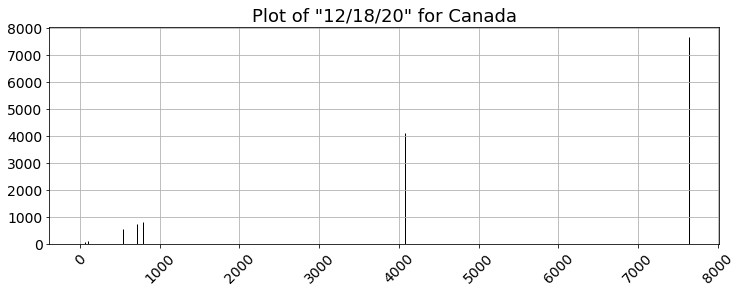

In [18]:
plot_var()

In [19]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Columns: 344 entries, Province/State to 12/26/20
dtypes: float64(2), int64(340), object(2)
memory usage: 728.4+ KB


In [31]:
def plotTesting(lst_states=['France','Canada','Italy','US','Egypt'],df=df_confirmed):
    """
    Plots the cumulative confirmed cases during the period 12/18/2
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total confirmed cases",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['Country/Region']==s]['12/17/20'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" confirmed/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Confirmed Cases",fontsize=16)
    plt.show()

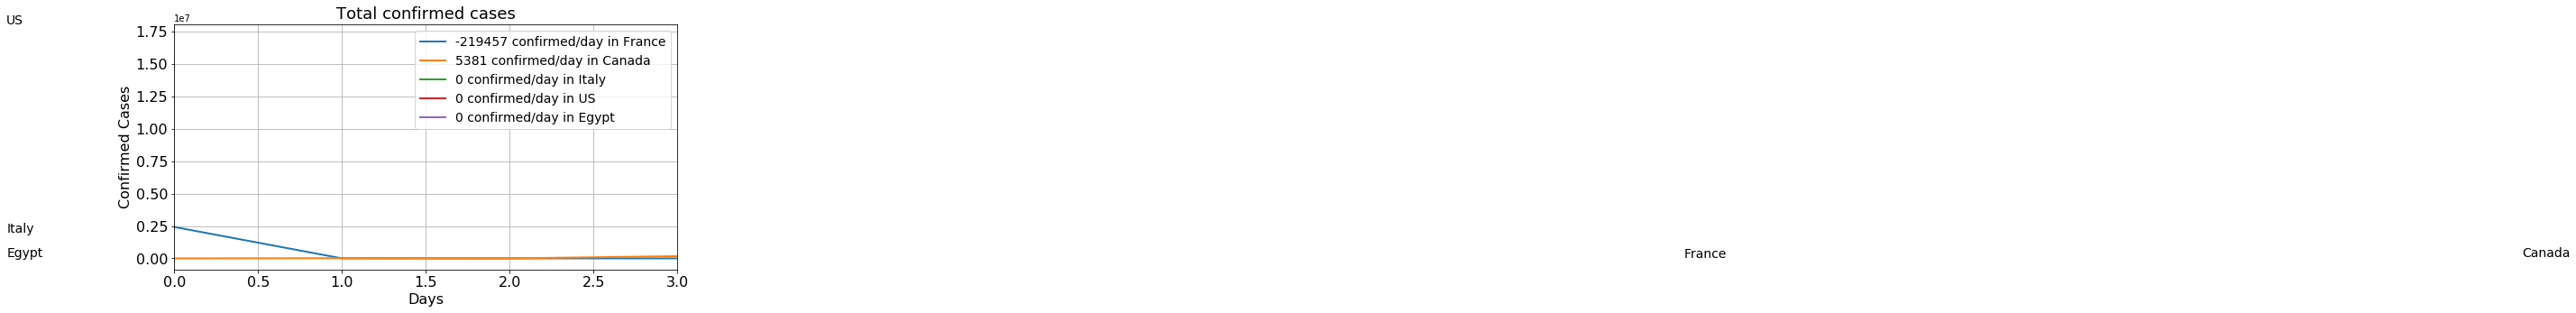

In [32]:
plotTesting()

In [33]:
df_confirmed.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49378,49621,49681,49817,50013,50190,50433,50655,50810,50886
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,51424,52004,52542,53003,53425,53814,54317,54827,55380,55755
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,93933,94371,94781,95203,95659,96069,96549,97007,97441,97857
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7466,7519,7560,7577,7602,7633,7669,7699,7756,7806
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16484,16562,16626,16644,16686,16802,16931,17029,17099,17149
